# Caso 4. Arbol de Regresión con datos Advertising. Programación Python
- Date: 19/10
- Autor: EZEQUIEL OLIVAS MELENDEZ

# Objetivo

Comparar modelos de supervisados a través de la aplicación de algoritmos de predicción de precios de automóviles determinando el estadístico del error cuadrático medio (rmse).

# Descripción

Se cargan los datos previamente preparados de la dirección <https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/CarPrice_Assignment.csv>

-   Participan todas las variables del conjunto de datos.

-   Se crean datos de entrenamiento al 80%

-   Se crean datos de validación al 20%

-   Se crea el modelo regresión múltiple con datos de entrenamiento

    -   Con este modelo se responde a preguntas tales como:

    -   ¿cuáles son variables que están por encima del 90% de confianza como predictores?,

    -   ¿Cuál es el valor de R Square Adjusted o que tanto representan las variables dependientes al precio del vehículo?

    -   Se generan predicciones con datos de validación

    -   Se determina el estadístico RMSE para efectos de comparación

-   Se crea el modelo árboles de regresión con los datos de entrenamiento

    -   Se identifica la importancia de las variables sobre el precio

    -   Se visualiza el árbol de regresión y sus reglas de asociación

    -   Se hacen predicciones con datos de validación

    -   Se determinar el estadístico RMSE para efectos de comparación

-   Se construye el modelo bosques aleatorios con datos de entrenamiento y con 20 árboles simulados

    -   Se identifica la importancia de las variables sobre el precio

    -   Se generan predicciones con datos de validación

    -   Se determina el estadístico RMSE para efectos de comparación

-   Al final del caso, se describe una interpretación personal comparando el estadístico RMSE de cada modelo y se menciona cual modelo es mejor predictor.

# Desarrollo

## Cargar librerías

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
# Preprocesado y moYdelado
from sklearn.model_selection import train_test_split
# Estadisticos y lineal múltiple
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
# Arbol de regresion
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Metricas
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## Cargar datos


In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/CarPrice_Assignment.csv")
datos

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Exploración de datos


In [3]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (205, 26)
Columnas y tipo de dato


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## Preparación de datos

### Eliminar variables

Quitar variables que no reflejan algún interés estadístico es decir, quitar la columnas 1 y 3, car_ID y CarName


In [4]:
datos = datos[['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight', 'enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg', 'price']]
datos


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Construir cariables Dummys

Existen variables que son categóricas: fueltype object aspiration object doornumber object carbody object drivewheel object enginelocation object enginetype object cylindernumber object fuelsystem object

Identificar variables Dummys y construir un conjunto de datos que incluye las variable dummis.

El método de la librería de Pandas llamado *get_dummies()* convierte los datos categóricos en variables indicadoras o ficticias.

¿Qué son las variable dummis?, significa realizar una codificación de una variable categórica para convertirla en varias columnas con el identificador del registro al que corresponde, obteniendo 1 o 0 en el caso de que se cumpla la condición en el registro.


In [5]:
datos_dummis = pd.get_dummies (datos, drop_first = True)
datos_dummis

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


### Datos de entrenamiento y validación

Datos de entrenamiento al 80% de los datos y 20% los datos de validación. Semilla 1287

In [7]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos_dummis.drop(columns = "price"), datos_dummis['price'],train_size = 0.80,  random_state = 1287)


#### Datos de entrenamiento


In [8]:
X_entrena


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
174,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,...,0,0,0,0,0,1,0,0,0,0
184,2,97.3,171.7,65.5,55.7,2264,97,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0
147,0,97.0,173.5,65.4,53.0,2455,108,3.62,2.64,9.0,...,0,0,0,0,0,0,0,1,0,0
145,0,97.0,172.0,65.4,54.3,2510,108,3.62,2.64,7.7,...,0,0,0,0,0,0,0,1,0,0
122,1,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,...,0,0,0,0,0,0,0,1,0,0
183,2,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,9.0,...,0,0,0,0,0,0,0,1,0,0
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,...,0,0,0,0,0,0,0,1,0,0
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,...,0,0,0,0,0,0,0,1,0,0


#### Datos de validación


In [9]:
X_valida


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
192,0,100.4,180.2,66.9,55.1,2579,97,3.01,3.400,23.0,...,0,0,0,0,0,1,0,0,0,0
120,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.230,9.4,...,0,0,0,1,0,0,0,0,0,0
95,1,94.5,165.6,63.8,53.3,2028,97,3.15,3.290,9.4,...,0,0,0,1,0,0,0,0,0,0
63,0,98.8,177.8,66.5,55.5,2443,122,3.39,3.390,22.7,...,0,0,0,0,0,1,0,0,0,0
189,3,94.5,159.3,64.2,55.6,2254,109,3.19,3.400,8.5,...,0,0,0,0,0,0,0,1,0,0
93,1,94.5,170.2,63.8,53.5,2024,97,3.15,3.290,9.4,...,0,0,0,1,0,0,0,0,0,0
24,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.230,9.4,...,0,0,0,1,0,0,0,0,0,0
110,0,114.2,198.9,68.4,58.7,3430,152,3.70,3.520,21.0,...,0,0,0,0,0,1,0,0,0,0
176,-1,102.4,175.6,66.5,54.9,2414,122,3.31,3.540,8.7,...,0,0,0,0,0,0,0,1,0,0
49,0,102.0,191.7,70.6,47.8,3950,326,3.54,2.760,11.5,...,0,1,0,0,0,0,0,1,0,0


## Modelos Supervisados

### Modelo de regresión lineal múltiple. (RM)

Se construye el modelo de regresión lineal múltiple (rm)


In [11]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

#### Coeficientes

Solo se muestran los coeficientes de: $\beta_1, \beta_2, ...\beta_n$

In [12]:
modelo_rm.coef_


array([ 1.88806907e+02,  1.22008720e+02, -2.50060967e+01,  6.94325940e+02,
        1.09452594e+02,  2.55905933e+00,  1.03648537e+02, -1.25630023e+03,
       -4.30630658e+03, -1.51739921e+03,  6.07436865e+00,  2.61274524e+00,
       -9.38862739e+01,  1.31263310e+02, -1.11872356e+04,  1.05112756e+03,
        3.05011247e+02, -4.18586554e+03, -4.44232315e+03, -3.84162295e+03,
       -4.92727336e+03, -2.33955275e+02,  1.04850486e+03,  7.55484894e+03,
       -5.26196034e+03, -8.81742931e+02,  3.16831624e+03,  1.37919081e+03,
       -5.70443997e+03, -1.29270205e+03, -1.04964788e+04, -1.12746470e+04,
       -6.01507288e+03, -1.92761515e+03,  1.81898940e-12, -1.29270205e+03,
        3.35098657e+02, -1.29270205e+03,  1.11872356e+04, -3.30736019e+03,
       -2.65668442e+02, -2.84091633e+03, -2.41944632e+02])

In [13]:
print(modelo_rm.score(X_entrena, Y_entrena))


0.9443063926889105


#### Predicciones del modelo rm


In [14]:
predicciones_rm = modelo_rm.predict(X_valida)
print(predicciones_rm[:-1])

[10358.20660298  5893.83440895  5872.54146175 11813.00919996
 13961.04723492  4979.20624095  5893.83440895 16980.41948283
  8563.26047738 40724.21682473  8348.8665958  10209.9056296
  9226.4692212   6534.41652844 14811.75579928 21889.70648294
  5392.80155971 15909.43771671  6461.64872394 17555.77098199
  7399.42946951  2669.84620323  9885.35319797 17074.55509831
 12523.49543045 22085.95512997 13684.12143077  5925.81455377
 17829.05447294 10856.27215681 20849.49451207 11224.14535468
  7385.65470238  6161.20897403  7011.9455661  32228.17790596
 37576.46414623 17268.11534853  7110.73257608  6256.37735663]


#### Tabla comparativa


In [15]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_rm.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
192          0      100.4      180.2      66.9       55.1        2579   
120          1       93.7      157.3      63.8       50.6        1967   
95           1       94.5      165.6      63.8       53.3        2028   
63           0       98.8      177.8      66.5       55.5        2443   
189          3       94.5      159.3      64.2       55.6        2254   
93           1       94.5      170.2      63.8       53.5        2024   
24           1       93.7      157.3      63.8       50.6        1967   
110          0      114.2      198.9      68.4       58.7        3430   
176         -1      102.4      175.6      66.5       54.9        2414   
49           0      102.0      191.7      70.6       47.8        3950   
159          0       95.7      166.3      64.4       52.8        2275   
81           3       96.3      173.0      65.4       49.4        2328   
3            2       99.8      176.6      66.2     

In [16]:
rmse_rm = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_rm,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_rm}")

El error (rmse) de test es: 2627.8470938198648


In [17]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones_rm)))


Root Mean Squared Error RMSE: 2627.8470938198648


### Modelo de árbol de regresión (AR)

Se construye el modelo de árbol de regresión (ar)


In [18]:
modelo_ar = DecisionTreeRegressor(
            #max_depth         = 3,
            random_state      = 2022
          )


In [19]:
modelo_ar.fit(X_entrena, Y_entrena)


DecisionTreeRegressor(random_state=2022)

Profundidad del árbol: 14
Número de nodos terminales: 154


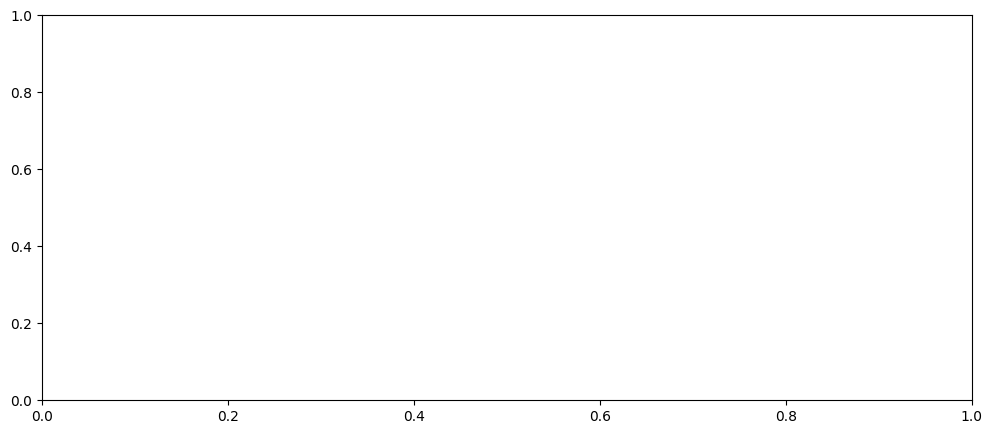

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del árbol: {modelo_ar.get_depth()}")
print(f"Número de nodos terminales: {modelo_ar.get_n_leaves()}")

Reglas de asociación del árbol


In [22]:
texto_modelo = export_text(
                    decision_tree = modelo_ar,
                    feature_names = list(datos_dummis.drop(columns = "price").columns)
               )
print(texto_modelo)

|--- enginesize <= 182.00
|   |--- curbweight <= 2659.50
|   |   |--- curbweight <= 2367.50
|   |   |   |--- curbweight <= 2115.50
|   |   |   |   |--- carbody_hatchback <= 0.50
|   |   |   |   |   |--- carlength <= 156.60
|   |   |   |   |   |   |--- value: [8916.50]
|   |   |   |   |   |--- carlength >  156.60
|   |   |   |   |   |   |--- carbody_sedan <= 0.50
|   |   |   |   |   |   |   |--- carlength <= 166.30
|   |   |   |   |   |   |   |   |--- value: [8249.00]
|   |   |   |   |   |   |   |--- carlength >  166.30
|   |   |   |   |   |   |   |   |--- value: [7999.00]
|   |   |   |   |   |   |--- carbody_sedan >  0.50
|   |   |   |   |   |   |   |--- curbweight <= 1944.00
|   |   |   |   |   |   |   |   |--- curbweight <= 1928.00
|   |   |   |   |   |   |   |   |   |--- enginesize <= 93.50
|   |   |   |   |   |   |   |   |   |   |--- value: [6575.00]
|   |   |   |   |   |   |   |   |   |--- enginesize >  93.50
|   |   |   |   |   |   |   |   |   |   |--- value: [6649.00]
|   |   | 

#### Importancia de los predictores


In [23]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos_dummis.drop(columns = "price").columns, 
                            'importancia': modelo_ar.feature_importances_}
                            )
                            
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo


,predictor,importancia
6,enginesize,0.663078
5,curbweight,0.227156
9,compressionratio,0.019611
10,horsepower,0.017610
1,wheelbase,0.013395
4,carheight,0.012092
2,carlength,0.011054
3,carwidth,0.009211
13,highwaympg,0.007146
26,enginetype_ohc,0.005399


Estos sería los predictores más importantes para el modelo de árbol de regresión *enginesize, curbweight, citympg, peakrpm, y wheelbase*

#### Predicciones del modelo (ar)


In [24]:
predicciones_ar = modelo_ar.predict(X = X_valida)
predicciones_ar

array([12290.,  6189.,  7198., 10245.,  9980.,  7999.,  6189., 17075.,
        8189., 35056.,  7898.,  6989.,  9995.,  7775., 13645., 16503.,
        6095., 15985.,  7395., 17425.,  7775.,  5572.,  9549., 19699.,
       18150., 16503., 14869.,  5389., 12964., 10595., 16503., 10245.,
        8358.,  7299.,  8249., 32250., 33278., 16630.,  6529.,  6649.,
        6377.])

#### Tabla comparativa


In [25]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_ar.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
192          0      100.4      180.2      66.9       55.1        2579   
120          1       93.7      157.3      63.8       50.6        1967   
95           1       94.5      165.6      63.8       53.3        2028   
63           0       98.8      177.8      66.5       55.5        2443   
189          3       94.5      159.3      64.2       55.6        2254   
93           1       94.5      170.2      63.8       53.5        2024   
24           1       93.7      157.3      63.8       50.6        1967   
110          0      114.2      198.9      68.4       58.7        3430   
176         -1      102.4      175.6      66.5       54.9        2414   
49           0      102.0      191.7      70.6       47.8        3950   
159          0       95.7      166.3      64.4       52.8        2275   
81           3       96.3      173.0      65.4       49.4        2328   
3            2       99.8      176.6      66.2     

#### RMSE modelo de ar


In [27]:
rmse_ar = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_ar,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_ar}")

El error (rmse) de test es: 2231.276540458399


#### Modelo de bosques aleatorios (RF)

Se construye el modelo de árbol de regresión (ar). Semilla 2022 y 20 árboles de entrenamiento

In [28]:
modelo_rf = RandomForestRegressor(n_estimators = 20, random_state = 2022)
modelo_rf.fit(X_entrena, Y_entrena)

RandomForestRegressor(n_estimators=20, random_state=2022)

#### Predicciones del modelo (rf)


In [29]:
predicciones_rf = modelo_rf.predict(X_valida)
predicciones_rf


array([11724.8       ,  6511.35      ,  7073.8       , 10235.7       ,
        8965.45      ,  7519.85      ,  6511.35      , 16889.95      ,
       10101.55      , 36121.075     ,  7235.1       ,  7623.55      ,
       10367.45      ,  7151.05      , 12924.9       , 17143.85      ,
        6236.55      , 14917.05      ,  7282.6       , 16914.075     ,
        7286.        ,  5675.925     ,  9167.25      , 17906.75      ,
       16911.2167    , 17143.85      , 13912.75      ,  5635.6       ,
       15356.15      , 10476.55      , 19882.85      , 10177.65      ,
        7846.76666667,  7058.45      ,  7383.1       , 34151.95      ,
       32100.7       , 16884.        ,  6426.4       ,  7352.5       ,
        6322.15      ])

#### Tabla comparativa


In [30]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_rf.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
192          0      100.4      180.2      66.9       55.1        2579   
120          1       93.7      157.3      63.8       50.6        1967   
95           1       94.5      165.6      63.8       53.3        2028   
63           0       98.8      177.8      66.5       55.5        2443   
189          3       94.5      159.3      64.2       55.6        2254   
93           1       94.5      170.2      63.8       53.5        2024   
24           1       93.7      157.3      63.8       50.6        1967   
110          0      114.2      198.9      68.4       58.7        3430   
176         -1      102.4      175.6      66.5       54.9        2414   
49           0      102.0      191.7      70.6       47.8        3950   
159          0       95.7      166.3      64.4       52.8        2275   
81           3       96.3      173.0      65.4       49.4        2328   
3            2       99.8      176.6      66.2     

#### RMSE modelo de ar


In [31]:
rmse_rf = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_rf,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 1945.2054486881266


## Evaluación de modelos

Se comparan las predicciones


In [32]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion_rm = predicciones_rm.flatten().tolist(), Precio_Prediccion_ar = predicciones_ar.flatten().tolist(), Precio_Prediccion_rf = predicciones_rf.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
192          0      100.4      180.2      66.9       55.1        2579   
120          1       93.7      157.3      63.8       50.6        1967   
95           1       94.5      165.6      63.8       53.3        2028   
63           0       98.8      177.8      66.5       55.5        2443   
189          3       94.5      159.3      64.2       55.6        2254   
93           1       94.5      170.2      63.8       53.5        2024   
24           1       93.7      157.3      63.8       50.6        1967   
110          0      114.2      198.9      68.4       58.7        3430   
176         -1      102.4      175.6      66.5       54.9        2414   
49           0      102.0      191.7      70.6       47.8        3950   
159          0       95.7      166.3      64.4       52.8        2275   
81           3       96.3      173.0      65.4       49.4        2328   
3            2       99.8      176.6      66.2     

In [33]:
rmse = np.array([[rmse_rm, rmse_ar, rmse_rf]])
rmse

array([[2627.84709382, 2231.27654046, 1945.20544869]])

In [34]:
rmse = pd.DataFrame(rmse)
rmse.columns = ['rmse_rm', 'rmse_ar', 'rmse_rf']
rmse

,rmse_rm,rmse_ar,rmse_rf
0,2627.847094,2231.27654,1945.205449


# Interpretación

El modelo que mejor interpreta los datos según el rmse es el de bosques aleatorios, al solo tener un valor de variación de 1945.205449 respecto a los datos reales.